# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


/var/folders/j8/mz7l4_197pn37cbb5wq5lgw40000gn/T/ipykernel_26163/118662127.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_sum = data.groupby(['year']).agg('sum').reset_index()


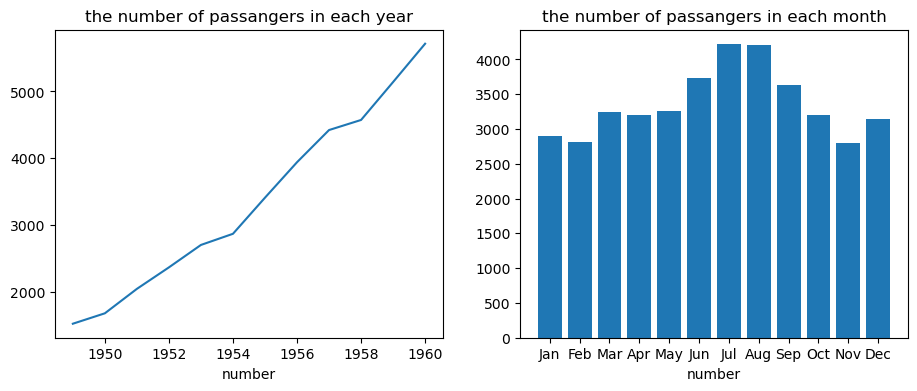

In [3]:
fig = plt.figure(figsize=(11,4))

year_sum = data.groupby(['year']).agg('sum').reset_index()
month_sum = data[['month', 'passengers']].groupby(['month']).agg('sum').reset_index()


plt.subplot(1,2,1)

x1 = year_sum.year
y1 = year_sum.passengers
plt.plot(x1, y1)
plt.xlabel('year')
plt.xlabel('number')
plt.title('the number of passangers in each year')

plt.subplot(1,2,2)

x2 = month_sum.month
y2 = month_sum.passengers

plt.bar(x2, y2)
plt.xlabel('month')
plt.xlabel('number')
plt.title('the number of passangers in each month')

plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [4]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


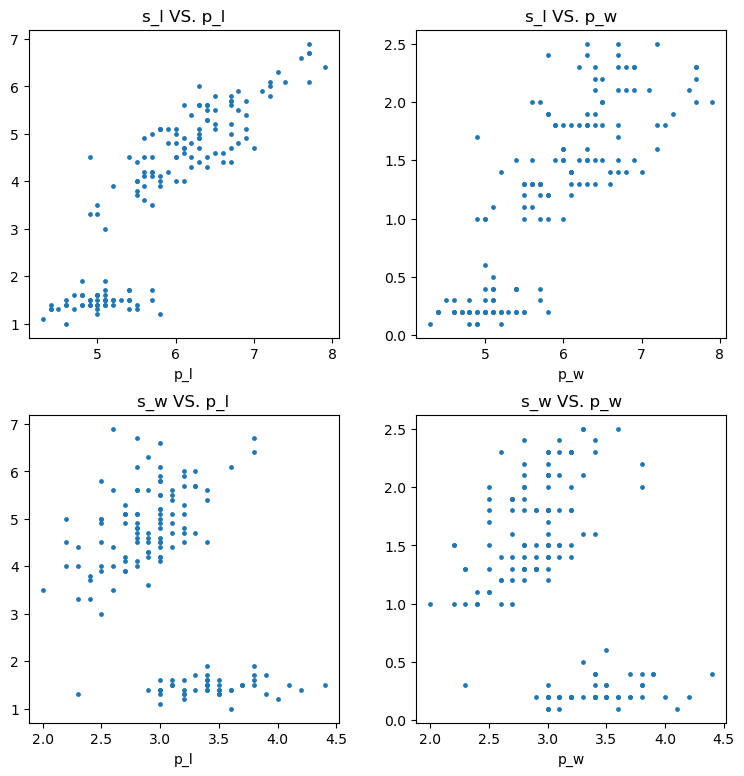

In [5]:
s_l = data.sepal_length
s_w = data.sepal_width
p_l = data.petal_length
p_w = data.petal_width


fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

size = 6

plt.subplot(2,2,1)

plt.scatter(s_l, p_l, s=size)
plt.xlabel('s_l')
plt.xlabel('p_l')
plt.title('s_l VS. p_l')

plt.subplot(2,2,2)

plt.scatter(s_l, p_w, s=size)
plt.xlabel('s_l')
plt.xlabel('p_w')
plt.title('s_l VS. p_w')

plt.subplot(2,2,3)

plt.scatter(s_w, p_l, s=size)
plt.xlabel('s_w')
plt.xlabel('p_l')
plt.title('s_w VS. p_l')

plt.subplot(2,2,4)

plt.scatter(s_w, p_w, s=size)
plt.xlabel('s_w')
plt.xlabel('p_w')
plt.title('s_w VS. p_w')

plt.show()

In [6]:
grouped = data.groupby('species')

for name, group in grouped:
    print(name)
    
data_1 = grouped.get_group('setosa')
data_2 = grouped.get_group('versicolor')
data_3 = grouped.get_group('virginica')

setosa
versicolor
virginica


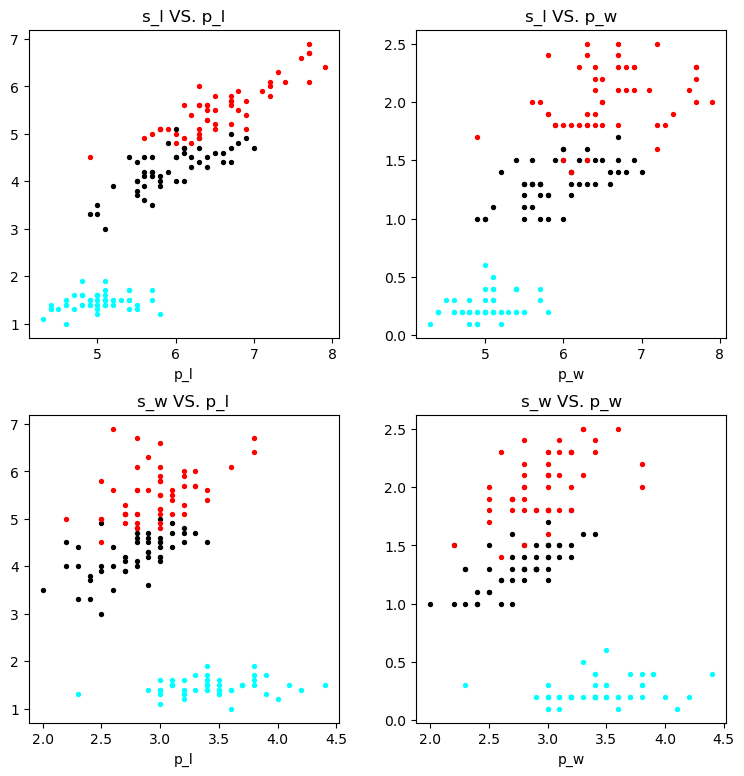

In [7]:
def My_plot_ll(data, size=10, color='k'):
    s_l = data.sepal_length
    p_l = data.petal_length
    plt.scatter(s_l, p_l, s=size, c=color)
    
def My_plot_lw(data, size=10, color='k'):
    s_l = data.sepal_length
    p_w = data.petal_width
    plt.scatter(s_l, p_w, s=size, c=color) 
    
def My_plot_wl(data, size=10, color='k'):
    s_w = data.sepal_width
    p_l = data.petal_length
    plt.scatter(s_w, p_l, s=size, c=color)
    
def My_plot_ww(data, size=10, color='k'):
    s_w = data.sepal_width
    p_w = data.petal_width
    plt.scatter(s_w, p_w, s=size, c=color)

fig = plt.figure(figsize=(9,9))
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)
size = 8

plt.subplot(2,2,1)

My_plot_ll(data_1, size = size, color = 'cyan')
My_plot_ll(data_2, size = size, color = 'black')
My_plot_ll(data_3, size = size, color = 'red')
plt.xlabel('s_l')
plt.xlabel('p_l')
plt.title('s_l VS. p_l')

plt.subplot(2,2,2)

My_plot_lw(data_1, size = size, color = 'cyan')
My_plot_lw(data_2, size = size, color = 'black')
My_plot_lw(data_3, size = size, color = 'red')
plt.xlabel('s_l')
plt.xlabel('p_w')
plt.title('s_l VS. p_w')

plt.subplot(2,2,3)

My_plot_wl(data_1, size = size, color = 'cyan')
My_plot_wl(data_2, size = size, color = 'black')
My_plot_wl(data_3, size = size, color = 'red')
plt.xlabel('s_w')
plt.xlabel('p_l')
plt.title('s_w VS. p_l')

plt.subplot(2,2,4)

My_plot_ww(data_1, size = size, color = 'cyan')
My_plot_ww(data_2, size = size, color = 'black')
My_plot_ww(data_3, size = size, color = 'red')
plt.xlabel('s_w')
plt.xlabel('p_w')
plt.title('s_w VS. p_w')

plt.show()

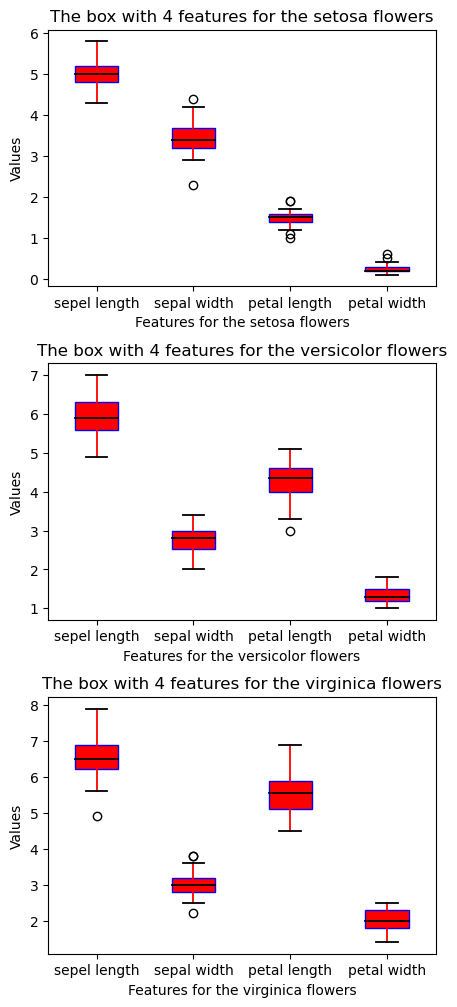

In [8]:
def My_BoxPlot(data_i):
    plt.boxplot(data_i[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
                patch_artist=True, boxprops={'facecolor': 'red', 'linewidth': 1,'edgecolor': 'blue'}, 
                medianprops={'linewidth': 1.3, 'color': 'black'}, 
                capprops={'linewidth': 1.3, 'color': 'black'}, 
                whiskerprops={'linewidth': 1.3, 'color': 'red'})
    
    x_position = [1,2,3,4]
    x_position_fmt = ['sepel length', 'sepal width', 'petal length', 'petal width']
    plt.xticks([i for i in x_position], x_position_fmt)
    
    flower_name = np.array(data_i['species'])[0]
    plt.xlabel('Features for the '+flower_name+' flowers')
    plt.ylabel('Values')
    plt.title('The box with 4 features for the '+flower_name+' flowers')
    

fig = plt.figure(figsize=(5,12))
plt.subplots_adjust(wspace = 0.25, hspace = 0.3)
size = 8

plt.subplot(3,1,1)
My_BoxPlot(data_1)



plt.subplot(3,1,2)
My_BoxPlot(data_2)


plt.subplot(3,1,3)
My_BoxPlot(data_3)


plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [9]:
data_F = sns.load_dataset("tips")
data_F.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

In [11]:
x = sm.add_constant(data_F['total_bill']) # 线性回归增加常数项
y = data_F['tip']
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()

# 从模型获得拟合数据
st, data, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名

fitted_values = data[:,2]

# 获得5%置信区间的上下界
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

# 创建置信区间DataFrame，上下界
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = data_F['total_bill']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True) # 根据x_data进行排序

In [12]:
# 打包的plt绘制函数
# 绘制置信区间
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label = '', y_label = '', title = ''):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制预测曲线
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # 绘制置信区间，顺序填充
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 显示图例，配合label参数，loc=“best”自适应方式
    ax.legend(loc = 'best')
    return ax

# 绘制散点图
def scatterplot(x_data, y_data, x_label = '', y_label = '', title = '', ax = None):
    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

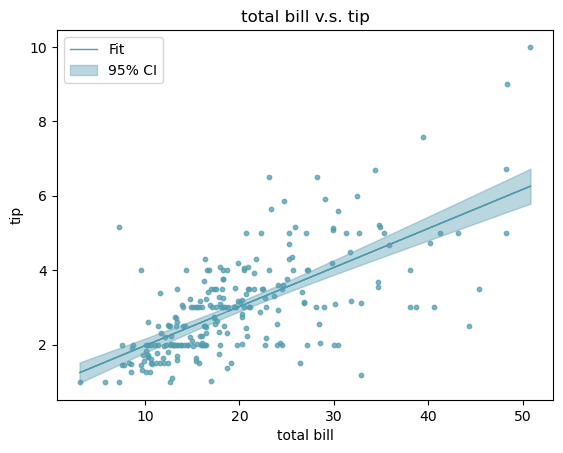

In [13]:
ax = lineplotCI(x_data = data_F['total_bill']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI'])

scatterplot(x_data = data_F['total_bill']
             , y_data = data_F['tip']
             , x_label = 'total bill'
             , y_label = 'tip'
             , title = 'total bill v.s. tip'
             , ax=ax)

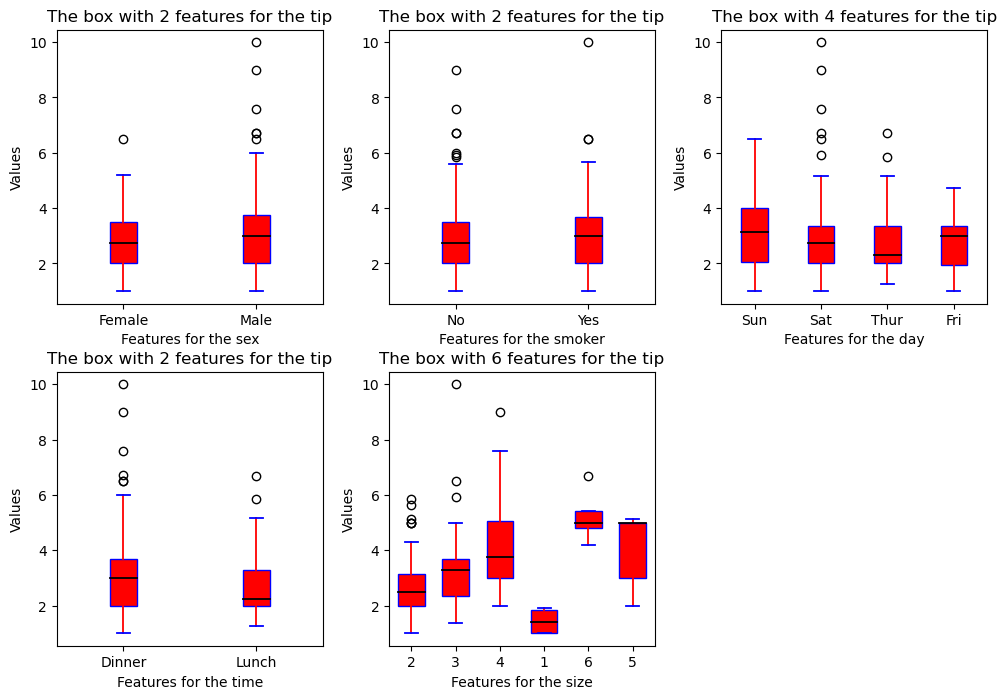

In [14]:
def My_BoxPlot(data_i, group_by_which):
    
    namelist = data_i[group_by_which].unique()
    grouped = data_i.groupby(group_by_which)
    
    for i in range(len(namelist)):
        plt.boxplot(grouped.get_group(namelist[i])[['tip']], widths = len(namelist) * 0.1, positions=[i+1], 
                patch_artist=True, boxprops={'facecolor': 'red', 'linewidth': 1,'edgecolor': 'blue'}, 
                medianprops={'linewidth': 1.3, 'color': 'black'}, 
                capprops={'linewidth': 1.3, 'color': 'blue'}, 
                whiskerprops={'linewidth': 1.3, 'color': 'red'})
    
    x_position = np.arange(len(namelist)) + 1.
    plt.xticks([i for i in x_position], namelist)
    
    plt.xlabel('Features for the '+group_by_which)
    plt.ylabel('Values')
    plt.title('The box with '+str(len(namelist))+' features for the tip')

    
fig = plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

plt.subplot(2,3,1)
My_BoxPlot(data_F, 'sex')

plt.subplot(2,3,2)
My_BoxPlot(data_F, 'smoker')

plt.subplot(2,3,3)
My_BoxPlot(data_F, 'day')

plt.subplot(2,3,4)
My_BoxPlot(data_F, 'time')

plt.subplot(2,3,5)
My_BoxPlot(data_F, 'size')


plt.show()

                    tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519


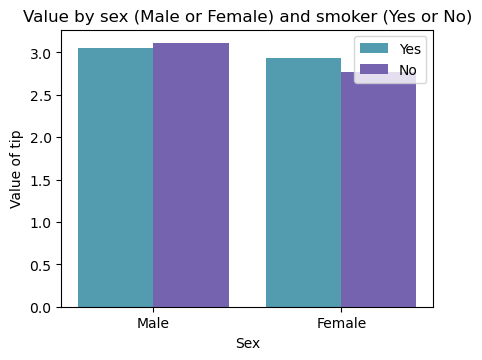

In [18]:
fig = plt.figure(figsize=(4.8,3.6))

data = data_F[['tip', 'sex', 'smoker']].groupby(['sex', 'smoker']).agg('mean').reset_index()
x_loc = [0.8, 1.2, 1.8, 2.2]

print(data_F[['tip', 'sex', 'smoker']].groupby(['sex', 'smoker']).agg('mean'))

for i in range(len(data)):
    sex_i = data.loc[i, 'sex']
    smoker_i = data.loc[i, 'smoker']
    tip_i = data.loc[i, 'tip']
    
    if smoker_i == 'Yes': color_i = '#539caf'
    else: color_i = '#7663b0'
    
    plt.bar(x_loc[i], tip_i, width = 0.4, color = color_i)
    
plt.legend(['Yes', 'No'])
        
plt.xticks([1,2], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Value of tip')
plt.title('Value by sex (Male or Female) and smoker (Yes or No)')
plt.show()

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [19]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
def check_bool(x):
    if x == 'yes': return 1
    elif x=='no': return 0
    else: return 'Error'

data.loc[:,'check'] = data.alive.map(lambda x: check_bool(x))

print((np.array(data[['survived']]) == np.array(data[['check']])).all())

True


In [21]:
def stat_data(data, group_by_which):
    stat = data[[group_by_which, 'survived']].groupby(group_by_which).agg('sum')
    stat['total'] = data[[group_by_which, 'survived']].groupby(group_by_which).agg('count')
    stat['unsurvived'] = stat['total'] - stat['survived']
    stat['survived_prop'] = stat['survived']/stat['total']
    stat['unsurvived_prop'] = stat['unsurvived']/stat['total']
    return stat

stat_class = stat_data(data, 'pclass')
stat_sex = stat_data(data, 'sex')

print(stat_class.head())
print(' ')
print(stat_sex.head())

        survived  total  unsurvived  survived_prop  unsurvived_prop
pclass                                                             
1            136    216          80       0.629630         0.370370
2             87    184          97       0.472826         0.527174
3            119    491         372       0.242363         0.757637
 
        survived  total  unsurvived  survived_prop  unsurvived_prop
sex                                                                
female       233    314          81       0.742038         0.257962
male         109    577         468       0.188908         0.811092


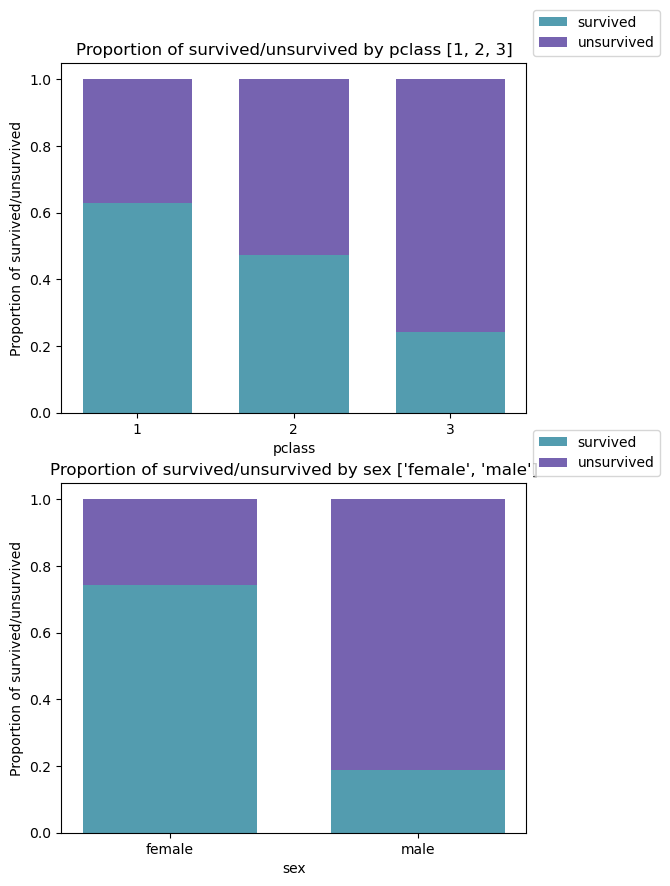

In [22]:
def My_bar_plot(data, name):
    stat = stat_data(data, name)

    keylist = sorted(list(data[name].unique()))
    xlist = np.arange(len(keylist))

    for i in range(len(keylist)):
        x = xlist[i]
        y1 = stat.loc[keylist[i], ['survived_prop']]
        y2 = stat.loc[keylist[i], ['unsurvived_prop']]

        plt.bar(x, y1, color = '#539caf', width = 0.7)
        plt.bar(x, y2, color = '#7663b0', width = 0.7, bottom = y1)

    plt.legend(['survived', 'unsurvived'], loc = 3, bbox_to_anchor = (1,1))
    plt.xticks(xlist, keylist)
    plt.xlabel(name)
    plt.ylabel('Proportion of survived/unsurvived')
    plt.title('Proportion of survived/unsurvived by ' + name + ' ' + str(keylist))

fig = plt.figure(figsize = (6,10))    

plt.subplot(2,1,1)
My_bar_plot(data, 'pclass')

plt.subplot(2,1,2)
My_bar_plot(data, 'sex')

plt.show()

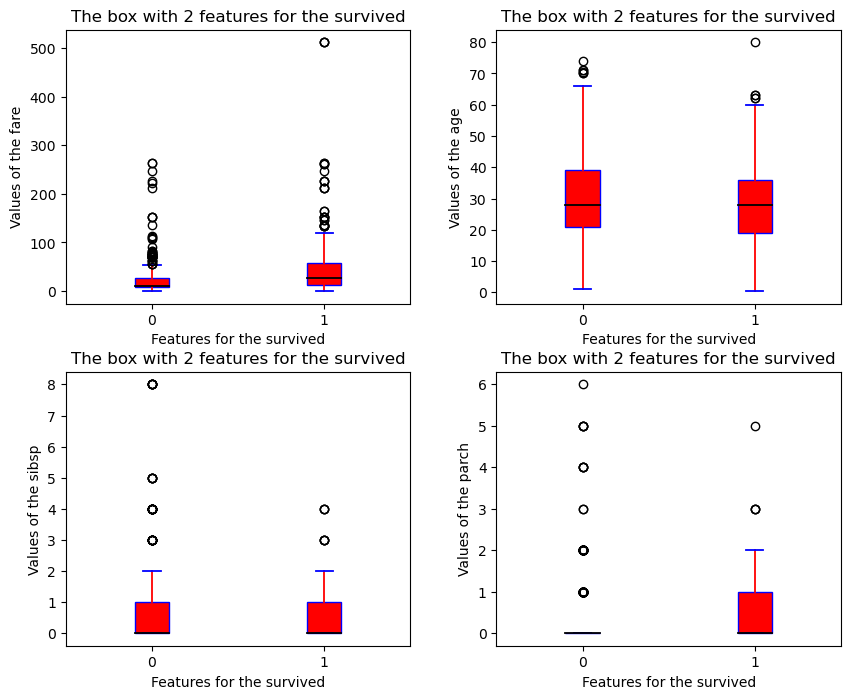

In [23]:
def My_BoxPlot(data_i, group_by_which, name):
    
    namelist = data_i[group_by_which].unique()
    grouped = data_i.groupby(group_by_which)
    
    for i in range(len(namelist)):
        pltdata = grouped.get_group(namelist[i])[[name]].dropna(how = 'all')
        plt.boxplot(pltdata, widths = len(namelist) * 0.1, positions=[i+1], 
                patch_artist=True, boxprops={'facecolor': 'red', 'linewidth': 1,'edgecolor': 'blue'}, 
                medianprops={'linewidth': 1.3, 'color': 'black'}, 
                capprops={'linewidth': 1.3, 'color': 'blue'}, 
                whiskerprops={'linewidth': 1.3, 'color': 'red'})
    
    x_position = np.arange(len(namelist)) + 1.
    plt.xticks([i for i in x_position], namelist)
    
    plt.xlabel('Features for the '+group_by_which)
    plt.ylabel('Values of the '+name)
    plt.title('The box with '+str(len(namelist))+' features for the ' + group_by_which)



fig = plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace = 0.25, hspace = 0.25)

plt.subplot(2,2,1)
My_BoxPlot(data, 'survived', 'fare')

plt.subplot(2,2,2)
My_BoxPlot(data, 'survived', 'age')

plt.subplot(2,2,3)
My_BoxPlot(data, 'survived', 'sibsp')

plt.subplot(2,2,4)
My_BoxPlot(data, 'survived', 'parch')


plt.show()

In [24]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title, location = 'upper right'):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = location)

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


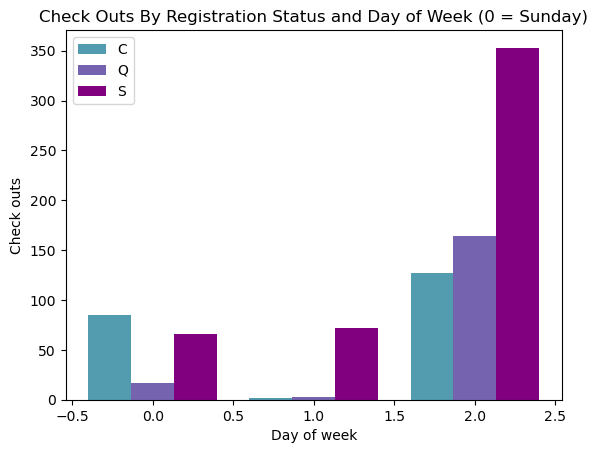

In [25]:
res1 = pd.pivot_table(data, index=['embarked'], values=['survived'], columns=['pclass'], aggfunc=['count'])
res1 = res1[('count', 'survived')]
print(res1)

groupedbarplot(x_data = np.arange(len(res1.index.values))
               , y_data_list = [res1[(1)], res1[(2)], res1[(3)]]
               , y_data_names = ['C', 'Q', 'S']
               , colors = ['#539caf', '#7663b0', 'purple']
               , x_label = 'Day of week'
               , y_label = 'Check outs'
               , title = 'Check Outs By Registration Status and Day of Week (0 = Sunday)'
               , location = 'upper left')

survived    0    1
alone             
False     175  179
True      374  163


<Figure size 640x480 with 0 Axes>

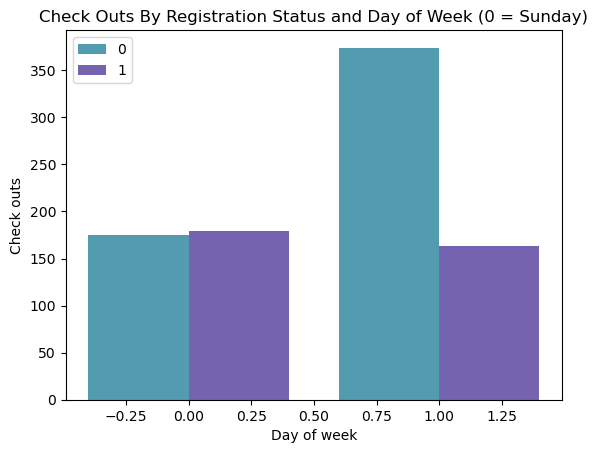

In [26]:
res2 = pd.pivot_table(data, index=['alone'], values=['alive'], columns=['survived'], aggfunc=['count'])
res2 = res2[('count', 'alive')]
print(res2)

fig = plt.figure()

groupedbarplot(x_data = np.arange(len(res2.index.values))
               , y_data_list = [res2[(0)], res2[(1)]]
               , y_data_names = [0, 1]
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day of week'
               , y_label = 'Check outs'
               , title = 'Check Outs By Registration Status and Day of Week (0 = Sunday)'
               , location = 'upper left')

plt.show()